<a href="https://colab.research.google.com/github/adidror005/youtube-videos/blob/main/Llama_Index_RAG_Minimilist_Example_Video_Actual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  RAG (Retrieval-Augmented Generation)
* RAG enhances the accuracy and reliability of LLMs by incorporating facts from external sources.
* LLMs are only trained up to a certain point and lack real-time information, as well as access to external news or documents necessary for precise answers.

* **LlamaIndex** is the leading data framework for building LLM applications. It is also a simple, flexible data framework for connecting custom data sources to large language models (LLMs).

https://docs.llamaindex.ai/en/stable/

![img](https://github.com/adidror005/youtube-videos/blob/main/rag_diagram.png?raw=true)

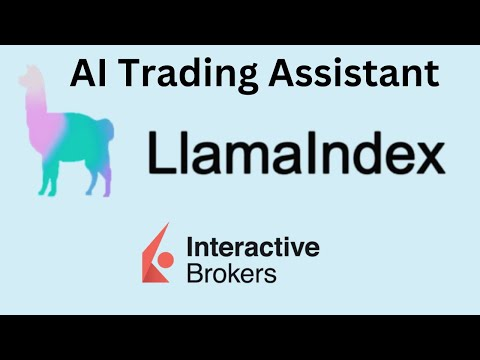

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('9GMkSs5gR4Y')

In [5]:
!pip install llama_index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.4 MB/s eta 0:00:00


#### Need open ai api key for default

1.   https://openai.com/index/openai-api/


In [6]:
from google.colab import userdata
import os
os.environ['OPENAI_API_KEY']=userdata.get('OPEN_AI_KEY')

#### Load dataset with pandas

In [7]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/adidror005/youtube-videos/main/small_news_dataset%20(1).csv")

df.head()

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url
0,Anan Ashraf,<p><strong>Future Fund&nbsp;</strong>Managing ...,2024-05-18T08:03:56Z,Tesla Bull Gary Black Says 'Likely' Approval O...,38907041,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Gary Black predicts shareholders will likely a...,['TSLA'],2024-05-18T08:04:55Z,https://www.benzinga.com/news/24/05/38907041/t...
1,Anusuya Lahiri,"<p>This past week, eight companies in&nbsp;<st...",2024-05-06T18:59:43Z,"Thanks To Apple, This Analyst Is Optimistic On...",38651469,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Key Insights from KeyBanc: Semiconductor Secto...,"['AAPL', 'AMD', 'ARM', 'ARW', 'AVT', 'CRUS', '...",2024-05-06T18:59:43Z,https://www.benzinga.com/analyst-ratings/analy...
2,Benzinga Neuro,"<p><strong>Ross Gerber</strong>, the CEO of <s...",2024-04-18T05:21:01Z,Tesla Board's Credibility At Stake With $56B E...,38306906,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,"Gerber, in an interview stated, &#34;I&#39;m s...",['TSLA'],2024-04-18T05:21:02Z,https://www.benzinga.com/markets/equities/24/0...
3,Vaishali Prayag,"<p><strong>Recursion Pharmaceuticals, Inc.</st...",2024-05-13T20:51:35Z,Recursion Pharmaceuticals Stock Surges 10% As ...,38802247,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,"Recursion Pharmaceuticals, Inc. (NASDAQ: RXRX)...","['NVDA', 'RXRX']",2024-05-13T20:51:36Z,https://www.benzinga.com/news/24/05/38802247/r...
4,Anusuya Lahiri,<p><strong>Nvidia Corp</strong> (NASDAQ:<a cla...,2024-04-22T12:44:44Z,Nvidia Joins Forces with Japan's Tech Institut...,38355877,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Nvidia partners with Japan&#39;s National Inst...,"['AMZN', 'MSFT', 'NVDA', 'TSM']",2024-04-22T12:44:44Z,https://www.benzinga.com/government/24/04/3835...


In [9]:
from IPython.display import HTML
HTML(df.content.iloc[0])

## Loading stage (Get your data)
* There are also advanced connectors like or readors like SimpleDirectoryReador, SlackReader,DiscordReader and many many more https://docs.llamaindex.ai/en/stable/module_guides/loading/connector/ BUT we will do basic.
* We will do it from scratch without connectors in this example.
  - We add metadata since later we want to maybe search based on metadata filters also
  - Document(text=text,metadata=dictionary_of_meta_data)

In [12]:
from llama_index.core import Document, VectorStoreIndex
documents = []
for index, row in df.iterrows():
    print(index)
    print(row)
    text=row['content']
    row_dict = row.to_dict()
    meta_data_dict = {k:v for k,v in row_dict.items() if k in ['created_at','author']}
    documents.append(Document(text=text,metadata=meta_data_dict))



0
author                                              Anan Ashraf
content       <p><strong>Future Fund&nbsp;</strong>Managing ...
created_at                                 2024-05-18T08:03:56Z
headline      Tesla Bull Gary Black Says 'Likely' Approval O...
id                                                     38907041
images        [{'size': 'large', 'url': 'https://cdn.benzing...
source                                                 benzinga
summary       Gary Black predicts shareholders will likely a...
symbols                                                ['TSLA']
updated_at                                 2024-05-18T08:04:55Z
url           https://www.benzinga.com/news/24/05/38907041/t...
Name: 0, dtype: object
1
author                                           Anusuya Lahiri
content       <p>This past week, eight companies in&nbsp;<st...
created_at                                 2024-05-06T18:59:43Z
headline      Thanks To Apple, This Analyst Is Optimistic On...
id           

In [13]:
len(documents)

11

### Split document into nodes

In [14]:
from llama_index.core.node_parser import SentenceSplitter

In [17]:
parser = SentenceSplitter(chunk_size=512,chunk_overlap=64)
nodes = parser.get_nodes_from_documents(documents)
len(nodes)

34

## Indexing Stages
* Vector Index based on node embeddings is the most common, but there are of course other indexes like keyword indexes and metadata related indexes for querying.

### Vector Store Index
* Index nodes based on embeddings

In [18]:
index = VectorStoreIndex(nodes)

* Can view the embeddings for each node

In [20]:
len(index.vector_store.data.embedding_dict.values())

34

In [26]:
index.vector_store.data.embedding_dict.keys()

dict_keys(['abc4623f-fdb4-48b5-8fb2-b8b29dc7dca7', 'fc345690-bfc4-45f9-804a-bfe67f8a20ea', 'ccbe8d07-ad7b-410a-a4e5-52b7a1767b3b', '6b8d17cd-bbaf-4d91-b9f7-40a2ff03b84d', '99bf380b-ed6e-438f-aad9-8ac06dd9901f', '4f520c7f-b154-4736-a050-e695365a98f3', '41642fce-4385-4762-8744-066b6999a05a', '83553506-58b0-44e4-a28a-21a2654a9ced', '8ab287f2-9440-4c6a-9c2a-d30a974c4258', '478001d7-f0e8-41de-acf4-830e7f833694', '71a4794d-c5ea-4e47-af02-023c2c2784fb', '220ee6cd-ece0-4ac4-bceb-1e1ad2961fa1', '0d275d54-ebc1-4cbc-b83a-c85945c380e1', '061b7375-5d2c-4114-97fe-b5d653509ff6', 'b8d14ef5-d830-478b-ac8b-db079fb869ec', 'cffb3c60-eae9-4d44-9ce3-543e4c8a1b8b', '1cdccfee-2a91-4c62-8bc2-841550a6e92c', '1b53847f-79ad-4f0b-9d74-5f84ec285287', '09f9b9c7-91f4-43ea-a0ba-855dbcce52ee', '5ad1ca38-63b8-47d5-9711-4c112aa048d9', 'd4c66bd3-7499-4ee9-92f9-ed3bd5bee07d', '6c608b26-9a34-4083-a240-9df74ad91565', '07e8b0ce-e600-4aa2-8851-e3e9a1189ef2', 'c1471b5a-febc-4be7-893d-3d482114cd18', '09182df1-4d2b-436e-bb2a-fbf3

In [27]:
embedding_example=index.vector_store.data.embedding_dict['abc4623f-fdb4-48b5-8fb2-b8b29dc7dca7']
len(embedding_example)

1536

#### Get Query Engine For Retrieval and Synthesis

In [28]:
query_engine = index.as_query_engine(
    response_mode='tree_summarize',similarity_top_k=3
)

* Query the query engine to get the response

In [29]:
query = "What are some upcoming dates TSLA investors should keep their eyes on related to Elon Musk's comp plan"
response = query_engine.query(query)

In [30]:
print(response.response)

Investors should keep an eye on the upcoming annual shareholder meeting scheduled for June 13, 2024, at 3:30 p.m. Central Time (CT) where the vote on the reinstatement of Elon Musk's 2018 compensation package is expected to take place. Additionally, the new vote on Musk's $56 billion pay package is set to occur on May 7.


In [31]:
query = "What are some upcoming dates TSLA investors should keep their eyes on"
response = query_engine.query(query)

In [32]:
print(response.response)

Investors in TSLA should keep an eye on the upcoming annual shareholder meeting scheduled for June 13, 2024, at 3:30 p.m. Central Time (CT). This meeting is expected to be a major catalyst for the company's future direction. Additionally, there is a vote set to take place on May 7 regarding the reinstatement of Elon Musk's $56 billion pay package, which could also be significant for TSLA investors.


* Can view the 3 nearest neighbor nodes to the query

In [33]:
len(response.source_nodes)

3

In [34]:
response.source_nodes[0]

NodeWithScore(node=TextNode(id_='fc345690-bfc4-45f9-804a-bfe67f8a20ea', embedding=None, metadata={'author': 'Anan Ashraf', 'created_at': '2024-05-18T08:03:56Z'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='20bad3ab-2907-4d2c-9537-bc7a89b2182f', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'author': 'Anan Ashraf', 'created_at': '2024-05-18T08:03:56Z'}, hash='5806882f7748857ada563c97154bc87c2ef0f99cd3ebf19638e31c9875e2fe64'), <NodeRelationship.PREVIOUS: '2'>: RelatedNodeInfo(node_id='abc4623f-fdb4-48b5-8fb2-b8b29dc7dca7', node_type=<ObjectType.TEXT: '1'>, metadata={'author': 'Anan Ashraf', 'created_at': '2024-05-18T08:03:56Z'}, hash='0ee9652ca1ee56e2155bfd29c8fcf3e37838ae6efbf10ef977aabd94a35f1aa4'), <NodeRelationship.NEXT: '3'>: RelatedNodeInfo(node_id='ccbe8d07-ad7b-410a-a4e5-52b7a1767b3b', node_type=<ObjectType.TEXT: '1'>, metadata={}, hash='e1c31f212f684af62c2f7d443b04d6b1aa78d72f96e1635532

In [38]:
for i,node in enumerate(response.source_nodes):
  print(f"Node {i}, Similarity Score: {node.score}")
  #print(node.text)



Node 0, Similarity Score: 0.8574934434015743
Node 1, Similarity Score: 0.8457253862201292
Node 2, Similarity Score: 0.8274041283169714


* We can manually see how these similarity scores are computed by
1. Embedding Query
2. Calculating cosine similarity between node embedding and query embedding.

In [39]:
from llama_index.core import Settings

query_embedding = Settings.embed_model.get_text_embedding(query)

In [40]:
len(query_embedding)

1536

In [41]:
retrieved_node_id=response.source_nodes[0].node_id
retrieved_node_id

'fc345690-bfc4-45f9-804a-bfe67f8a20ea'

In [42]:
retrieved_node_embedding=index.vector_store.data.embedding_dict[retrieved_node_id]
len(retrieved_node_embedding)

1536

* Calculate cosine similarity between retrieved node embedding + query embedding vector

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([query_embedding],[retrieved_node_embedding])

array([[0.85749344]])

### A few notes on customization
* Can set settings.embed_model and settings.llm_model to customize
* Can customize embeding model
* Can customize llm model
* See guide below you can use models on Ollama/Huggingface/many other models.
https://docs.llamaindex.ai/en/stable/module_guides/models/




In [44]:
from llama_index.core import Settings
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding


Settings.embed_model = OpenAIEmbedding(model="text-embedding-ada-002")
Settings.llm_model = OpenAI(model="text-davinci-003")


#### Here is an eample of how to use Huggingface embeddings

In [45]:
!pip install llama-index-embeddings-huggingface
!pip install llama-index-llms-huggingface
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 12.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core import Settings
import torch

Settings.embed_model = HuggingFaceEmbedding(
    model_name="BAAI/bge-small-en-v1.5"
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# setup prompts - specific to StableLM
from llama_index.core import PromptTemplate
from llama_index.llms.huggingface import HuggingFaceLLM


# This will wrap the default prompts that are internal to llama-index
# taken from https://huggingface.co/Writer/camel-5b-hf
query_wrapper_prompt = PromptTemplate(
    "Below is an instruction that describes a task. "
    "Write a response that appropriately completes the request.\n\n"
    "### Instruction:\n{query_str}\n\n### Response:"
)

llm = HuggingFaceLLM(
    context_window=2048,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.25, "do_sample": False},
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="Writer/camel-5b-hf",
    model_name="Writer/camel-5b-hf",
    device_map="auto", #Need pip install accelerate for this
    tokenizer_kwargs={"max_length": 2048},
    # uncomment this if using CUDA to reduce memory usage
    # model_kwargs={"torch_dtype": torch.float16}
)

Settings.chunk_size = 512
Settings.llm = llm